**Library Imports and Initial Setup**

This section imports all necessary libraries for data manipulation, and visualization.

In [ ]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations and array handling
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns           # For statistical data visualization with better aesthetics

**Data Loading and Initial Exploration**

Loading the BRFSS2015 dataset and performing initial data exploration to understand the structure, size, and basic characteristics of the data.

In [ ]:
# Load the dataset from specified path
dataset_path = '/content/1  heart_disease_health_indicators_BRFSS2015 (1).csv'  # Update with your file path
data = pd.read_csv(dataset_path)  # Read CSV file into pandas DataFrame

In [ ]:
# Basic information about the dataset - shows data types, non-null counts, memory usage
print("Dataset Overview:")
print(data.info())  # Display concise summary of DataFrame including index dtype and column dtypes

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-n

In [ ]:
# Summary statistics for numerical columns - mean, std, min, max, quartiles
print("\nSummary Statistics:")
print(data.describe())  # Generate descriptive statistics for numerical features


Summary Statistics:
       HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.0000

In [ ]:
# Check for missing values across all columns
print("\nMissing Values:")
print(data.isnull().sum())  # Count null values in each column


Missing Values:
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


**EDA- Exploratory Data Analysis**

**Target Variable Visualization**

Creating visualizations to understand the distribution of the target variable (heart disease presence) and identify class imbalance.

In [ ]:
# Analyze target variable distribution with percentages
print("\nTarget Variable Distribution (HeartDiseaseorAttack):")
print(data['HeartDiseaseorAttack'].value_counts(normalize=True) * 100)  # Show class distribution as percentages


Target Variable Distribution (HeartDiseaseorAttack):
HeartDiseaseorAttack
0.0    90.581441
1.0     9.418559
Name: proportion, dtype: float64


<ipython-input-12-c1704eb2ab29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDiseaseorAttack', data=data, palette='coolwarm')


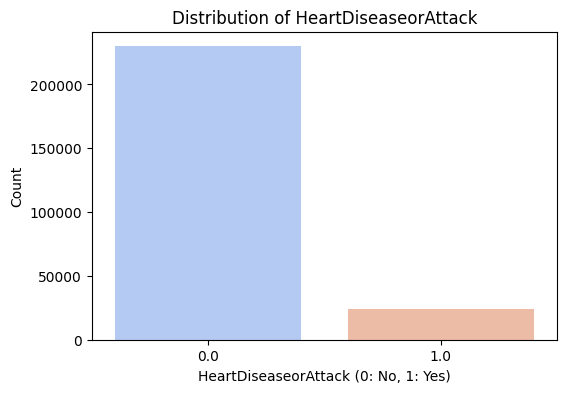

In [ ]:
# Create a simple count plot for target variable distribution
plt.figure(figsize=(6, 4))  # Set figure size for the plot
sns.countplot(x='HeartDiseaseorAttack', data=data, palette='coolwarm')  # Create count plot with color palette
plt.title('Distribution of HeartDiseaseorAttack')  # Add plot title
plt.xlabel('HeartDiseaseorAttack (0: No, 1: Yes)')  # Label x-axis with clear explanation
plt.ylabel('Count')  # Label y-axis
plt.show()  # Display the plot


**Advanced Target Variable Visualization**

Creating comprehensive visualizations using both bar plots and pie charts to better understand class distribution and imbalance.

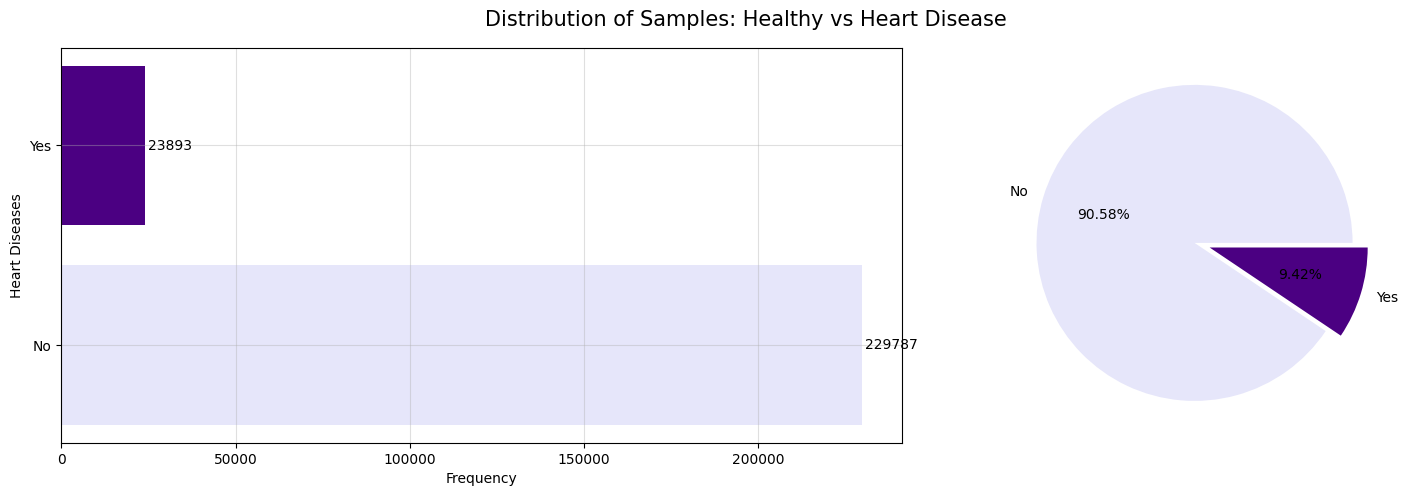

In [ ]:
# Get value counts for target variable
targets = data.HeartDiseaseorAttack.value_counts()  # Count occurrences of each class
colors = ['lavender','indigo']  # Define color scheme for visualizations

# Create subplot with different width ratios for bar and pie charts
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})

# Create horizontal bar chart showing class frequencies
axes[0].barh(y=targets.index, width=targets.values, color=colors)  # Horizontal bar plot
axes[0].set_xlabel('Frequency')  # Label x-axis
axes[0].set_ylabel('Heart Diseases')  # Label y-axis
axes[0].set_yticks([0,1], ['No','Yes'])  # Set custom y-tick labels
axes[0].grid(alpha=0.4)  # Add grid with transparency

# Add frequency values as text on bars
for index, values in enumerate(targets):
    axes[0].text(values+1000, index, str(values), va='center')  # Add text annotation with values

# Create pie chart showing percentage distribution
axes[1].pie(targets.values, labels=['No','Yes'], autopct='%.2f%%', 
           explode=([0.05]*len(targets.index)), colors=colors)  # Pie chart with explosion effect
figure.suptitle('Distribution of Samples: Healthy vs Heart Disease', fontsize=15)  # Add main title
plt.tight_layout(pad=1)  # Adjust layout to prevent overlap
plt.show()  # Display the combined plot

**Correlation Analysis**

Analyzing correlations between all features to identify relationships and potential multicollinearity issues.

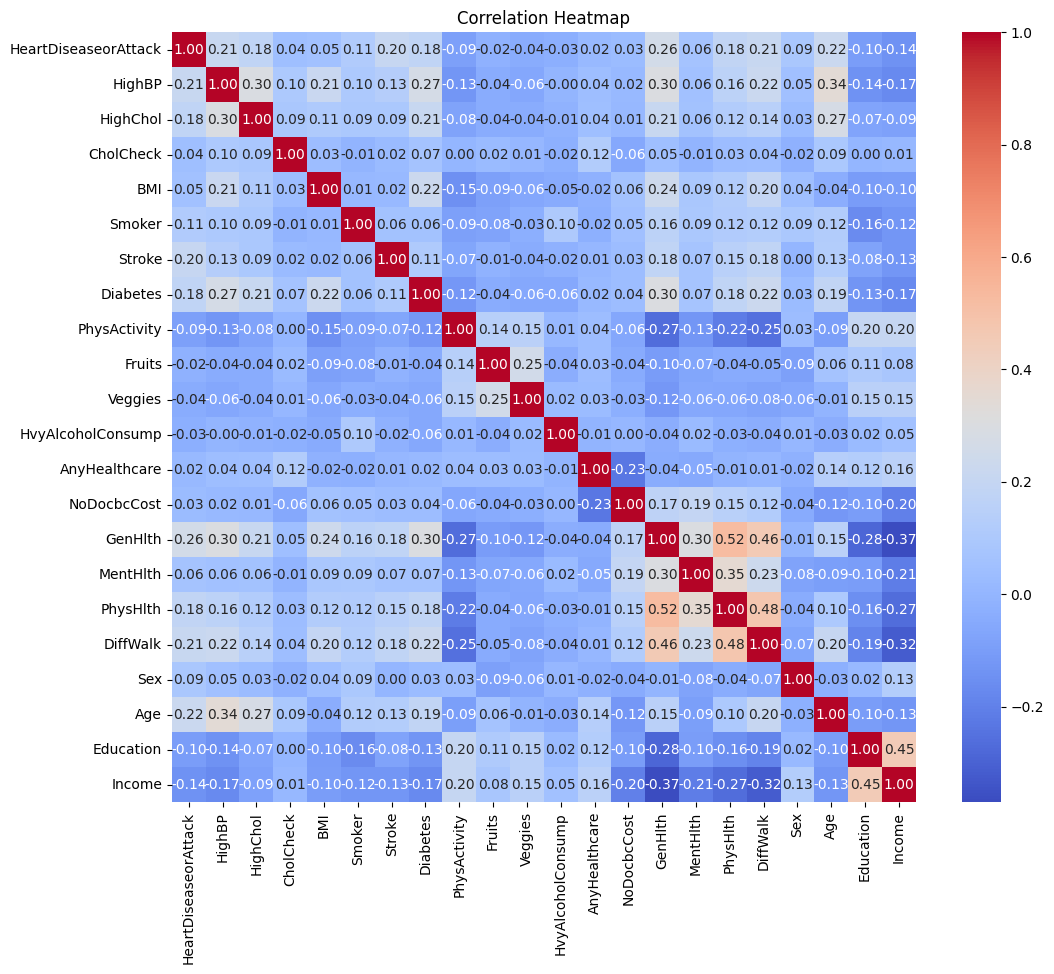

In [ ]:
# Create correlation heatmap for all features
plt.figure(figsize=(12, 10))  # Set large figure size for readability
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)  # Create annotated heatmap
# annot=True: Show correlation values, fmt=".2f": Format to 2 decimal places
# cmap="coolwarm": Use cool-warm color scheme, cbar=True: Show color bar
plt.title("Correlation Heatmap")  # Add title
plt.show()  # Display the heatmap

**Univariate Analysis - Numerical Features**

Analyzing the distribution of numerical features individually to understand their characteristics, skewness, and potential outliers.

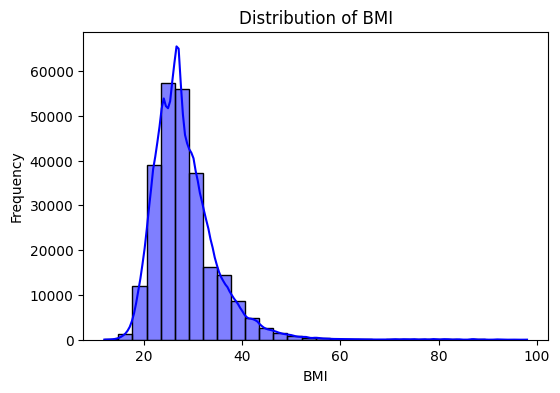

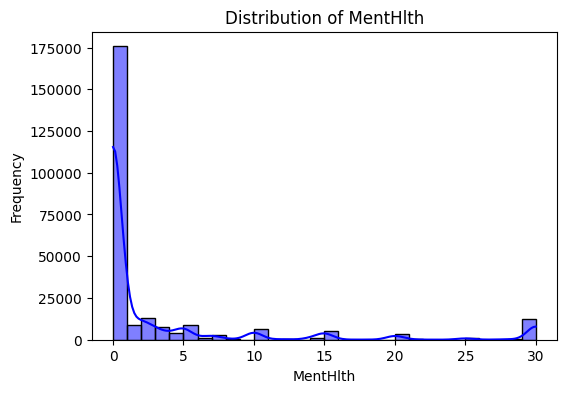

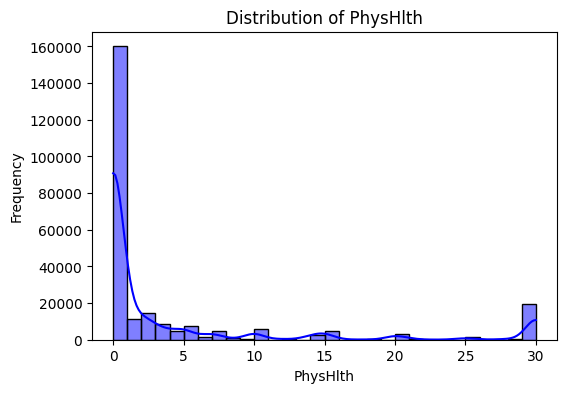

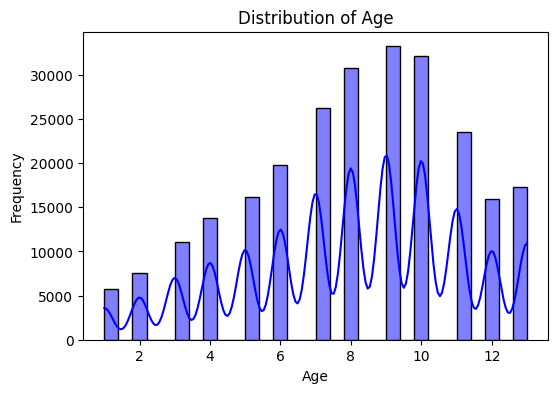

In [ ]:
# Define list of numerical features for analysis
num_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

# Create distribution plots for each numerical feature
for feature in num_features:  # Iterate through each numerical feature
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.histplot(data[feature], kde=True, bins=30, color='blue')  # Create histogram with KDE overlay
    # kde=True: Add kernel density estimation curve, bins=30: Use 30 histogram bins
    plt.title(f'Distribution of {feature}')  # Dynamic title based on feature name
    plt.xlabel(feature)  # Label x-axis with feature name
    plt.ylabel('Frequency')  # Label y-axis
    plt.show()  # Display each plot

**Univariate Analysis - Categorical Features**

Analyzing the distribution of categorical features to understand the frequency of different categories and identify potential data issues.

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


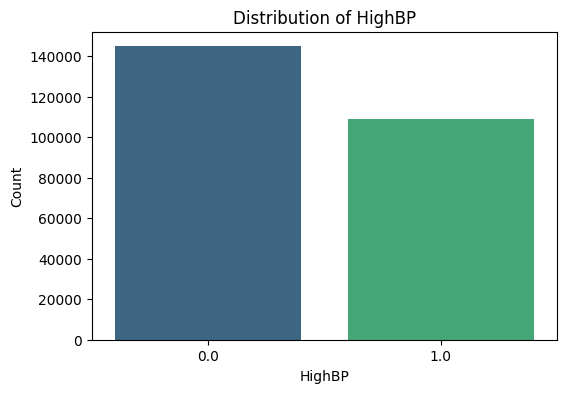

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


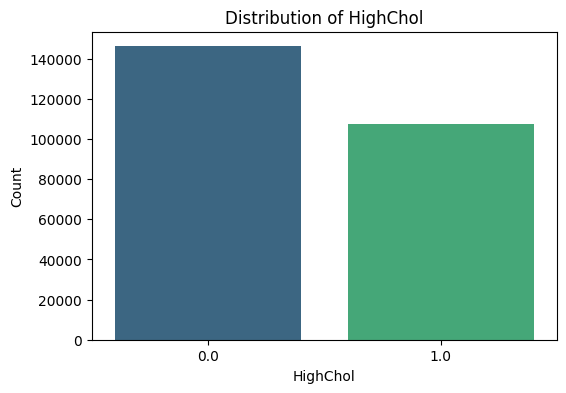

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


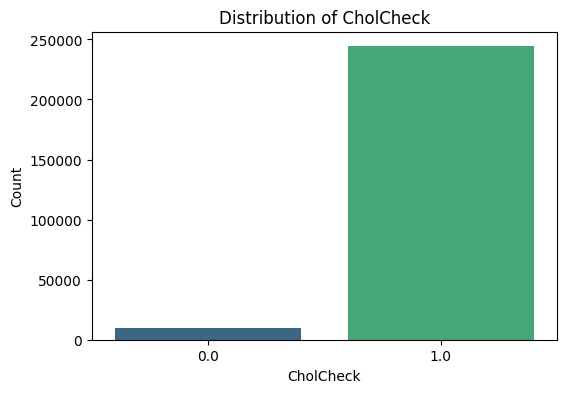

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


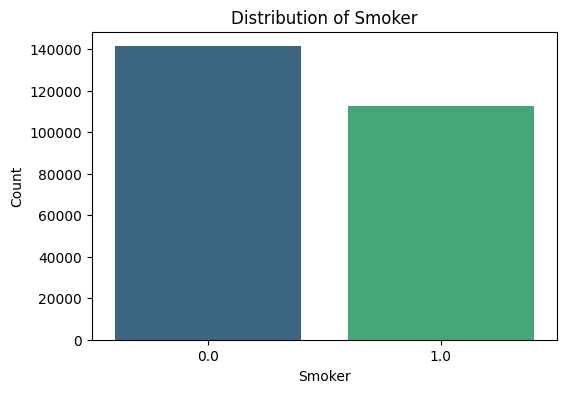

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


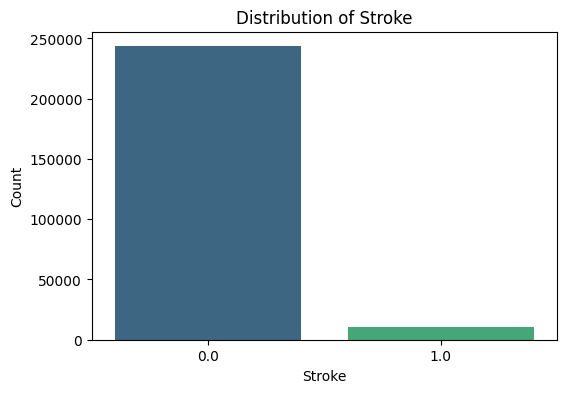

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


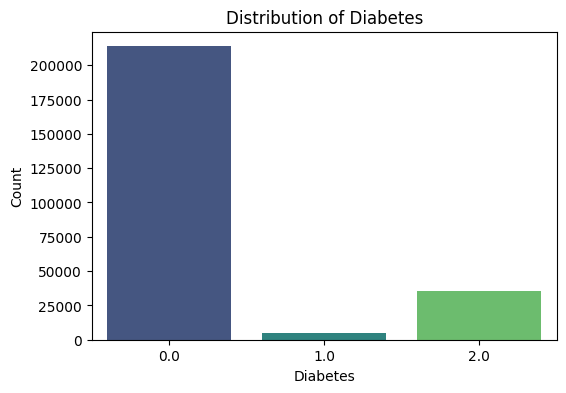

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


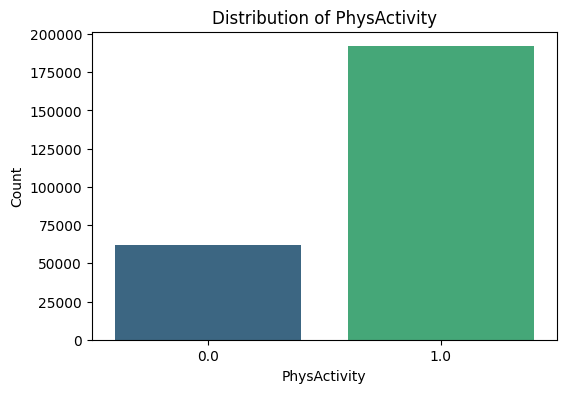

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


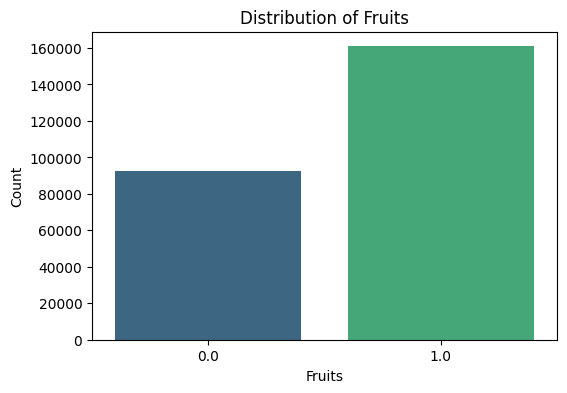

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


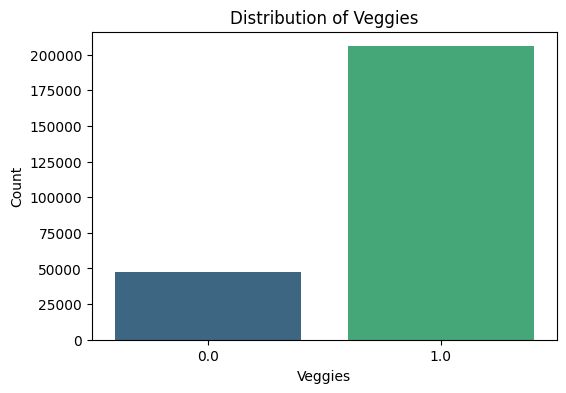

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


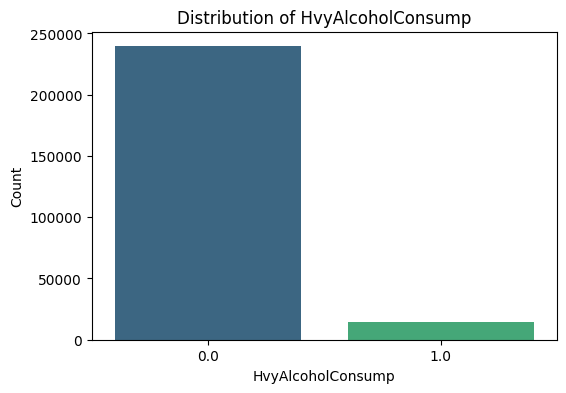

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


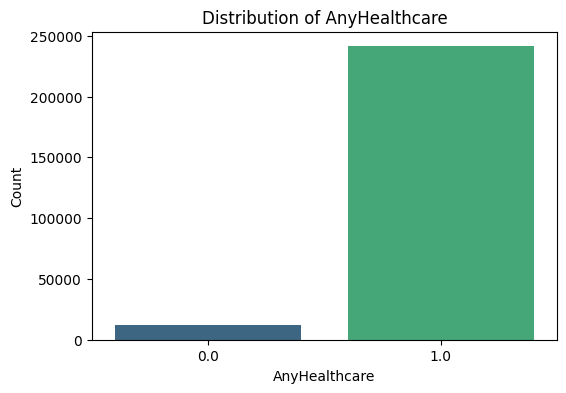

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


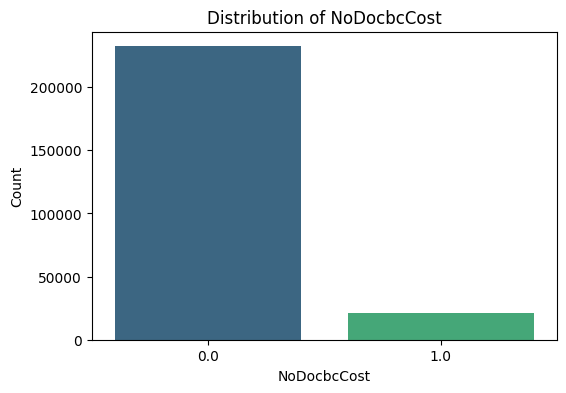

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


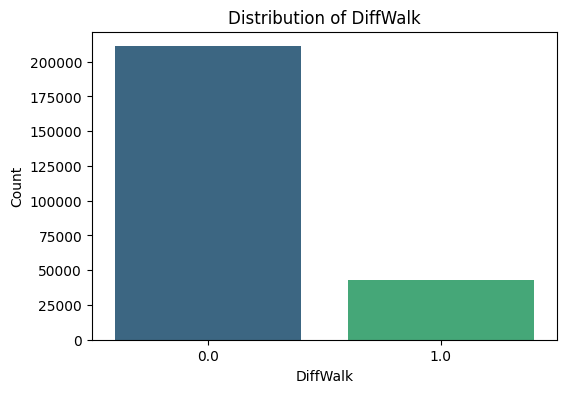

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


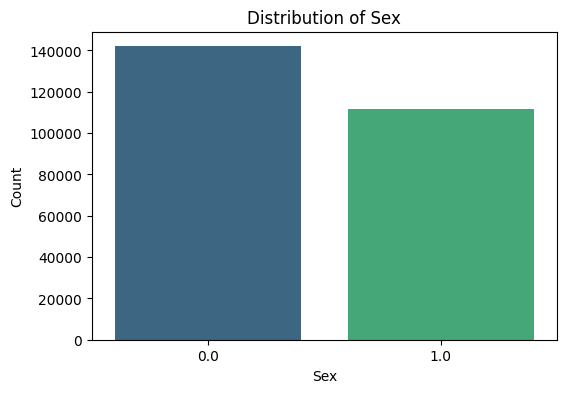

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


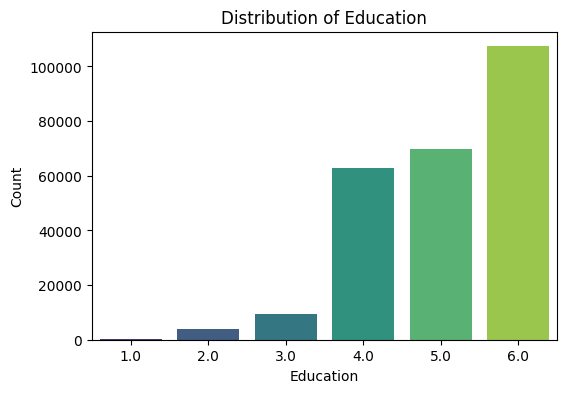

<ipython-input-16-9e29b1035b7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')


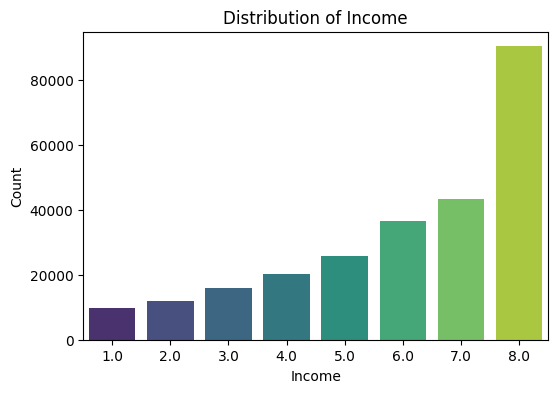

In [ ]:
# Define list of categorical features for analysis
cat_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Education', 'Income']

# Create count plots for each categorical feature
for feature in cat_features:  # Iterate through each categorical feature
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.countplot(x=feature, data=data, palette='viridis')  # Create count plot with viridis color palette
    plt.title(f'Distribution of {feature}')  # Dynamic title based on feature name
    plt.xlabel(feature)  # Label x-axis with feature name
    plt.ylabel('Count')  # Label y-axis
    plt.show()  # Display each plot

**Outlier Detection Analysis**

Using box plots to visually identify outliers in numerical features before applying outlier removal techniques.

<ipython-input-17-fcf16fa03839>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='Set2')


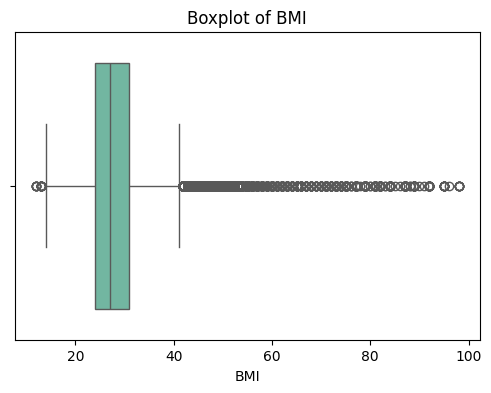

<ipython-input-17-fcf16fa03839>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='Set2')


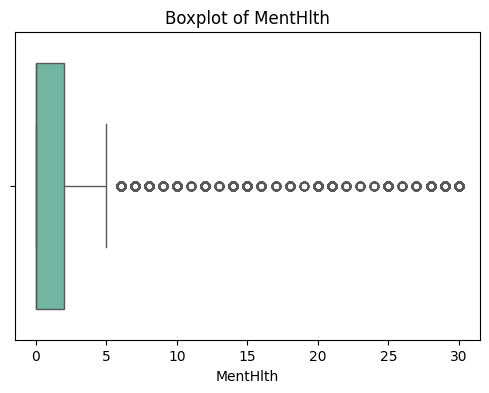

<ipython-input-17-fcf16fa03839>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='Set2')


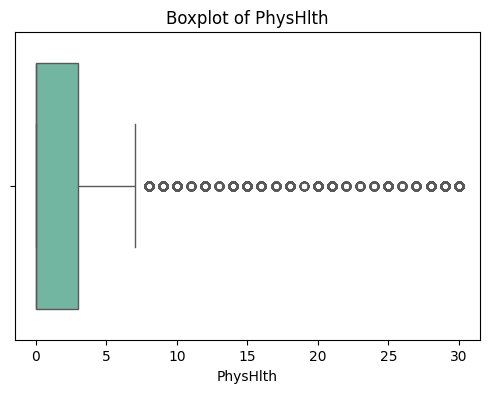

<ipython-input-17-fcf16fa03839>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette='Set2')


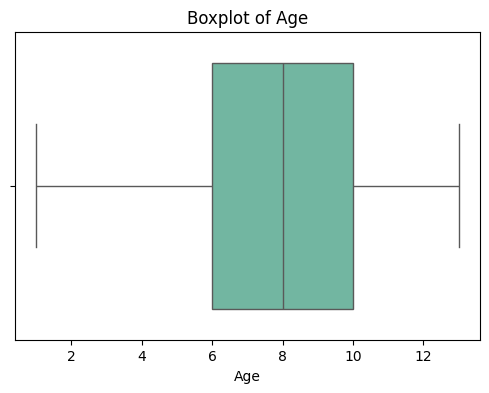

In [ ]:
# Create box plots to identify outliers in numerical features
for feature in num_features:  # Iterate through each numerical feature
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.boxplot(data=data, x=feature, palette='Set2')  # Create box plot with Set2 color palette
    plt.title(f'Boxplot of {feature}')  # Dynamic title based on feature name
    plt.xlabel(feature)  # Label x-axis with feature name
    plt.show()  # Display each plot

**Outlier Removal Implementation**

Implementing IQR (Interquartile Range) method to systematically remove outliers from numerical features to improve model performance.

BMI: Outliers removed - 243833 rows remaining
MentHlth: Outliers removed - 210276 rows remaining
PhysHlth: Outliers removed - 182522 rows remaining
Age: Outliers removed - 182522 rows remaining

Dataset shape after removing outliers: (182522, 22)


<ipython-input-18-f21aeb5c47be>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x=feature, palette='Set2')


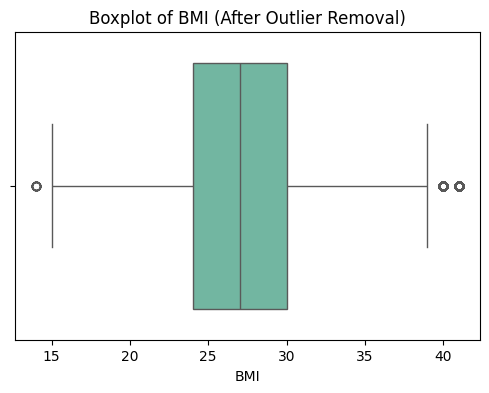

<ipython-input-18-f21aeb5c47be>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x=feature, palette='Set2')


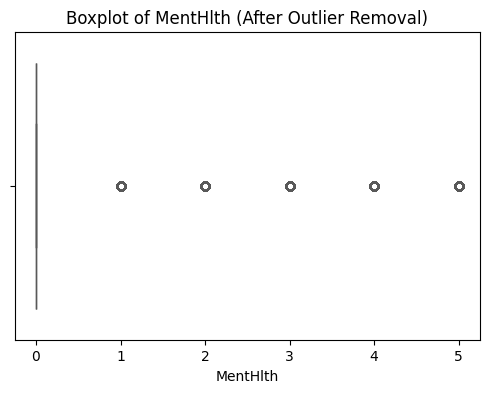

<ipython-input-18-f21aeb5c47be>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x=feature, palette='Set2')


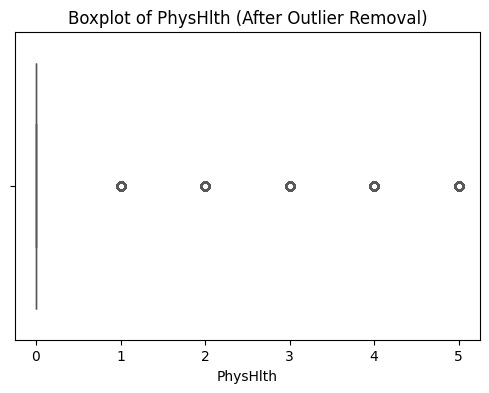

<ipython-input-18-f21aeb5c47be>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x=feature, palette='Set2')


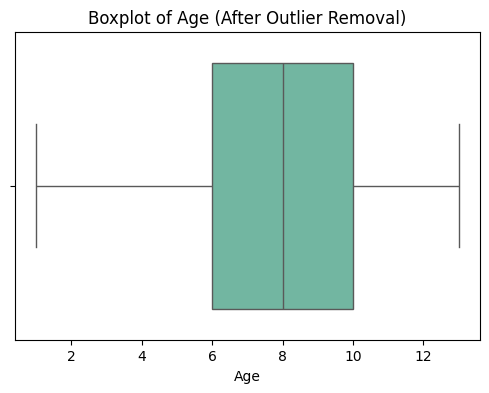

In [ ]:
# Function to remove outliers using IQR (Interquartile Range) method
def remove_outliers(data, features):
    for feature in features:  # Process each feature individually
        Q1 = data[feature].quantile(0.25)  # Calculate first quartile (25th percentile)
        Q3 = data[feature].quantile(0.75)  # Calculate third quartile (75th percentile)
        IQR = Q3 - Q1  # Calculate interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Calculate lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # Calculate upper bound for outliers

        # Filter the data to keep only the values within the bounds
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
        # Keep rows where feature value is between lower and upper bounds

        print(f"{feature}: Outliers removed - {len(data)} rows remaining")  # Print status update

    return data  # Return cleaned dataset

# Apply outlier removal to numerical features
num_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age']  # Define numerical features
data_cleaned = remove_outliers(data, num_features)  # Apply outlier removal function

# Verify the dataset shape after outlier removal
print("\nDataset shape after removing outliers:", data_cleaned.shape)  # Print new dataset dimensions


# Post-Outlier Removal Verification
# Verifying the effectiveness of outlier removal by creating new box plots to confirm outliers have been properly handled.
for feature in num_features:  # Iterate through each numerical feature
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.boxplot(data=data_cleaned, x=feature, palette='Set2')  # Create box plot with cleaned data
    plt.title(f'Boxplot of {feature} (After Outlier Removal)')  # Title indicating post-cleaning
    plt.xlabel(feature)  # Label x-axis with feature name
    plt.show()  # Display each plot

**Data Preparation and Class Imbalance Analysis using SMOTE**

Preparing the data for machine learning by separating features and target, and analyzing class imbalance before applying resampling techniques.

In [ ]:
# Import libraries for handling imbalanced datasets and data splitting
from imblearn.over_sampling import SMOTE  # SMOTE for synthetic minority oversampling
from sklearn.model_selection import train_test_split  # For splitting data into train/validation/test

# Alternative option commented out for reference:
# from imblearn.over_sampling import ADASYN  # ADASYN for adaptive synthetic sampling
# from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop('HeartDiseaseorAttack', axis=1)  # Features: all columns except target
y = data['HeartDiseaseorAttack']  # Target: heart disease indicator

# Print original class distribution to understand imbalance
print("\nOriginal Target Class Distribution:")
print(y.value_counts())  # Show count of each class (0: No disease, 1: Disease)


Original Target Class Distribution:
HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


**SMOTE Implementation for Class Balancing**

Applying SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset by generating synthetic examples of the minority class.

In [ ]:
# Alternative ADASYN approach (commented out):
# adasyn = ADASYN(random_state=0)  # Initialize ADASYN with fixed random state
# X_adasyn, y_adasyn = adasyn.fit_resample(X, y)  # Apply ADASYN resampling

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=0)  # Initialize SMOTE with fixed random state for reproducibility
X_sm, y_sm = smote.fit_resample(X, y)  # Apply SMOTE resampling to create balanced dataset

# Print new class distribution after SMOTE
print("\nBalanced Target Class Distribution After SMOTE:")
print(y_sm.value_counts())  # Show balanced class counts

# Alternative ADASYN results (commented out):
# print("\nBalanced Target Class Distribution After ADASYN:")
# print(y_adasyn.value_counts())

# Note: SMOTE provides more equal target (50:50) distribution than ADASYN


Balanced Target Class Distribution After SMOTE:
HeartDiseaseorAttack
0.0    229787
1.0    229787
Name: count, dtype: int64


**Post-SMOTE Class Distribution Visualization**

Visualizing the balanced class distribution after SMOTE application to confirm successful balancing.

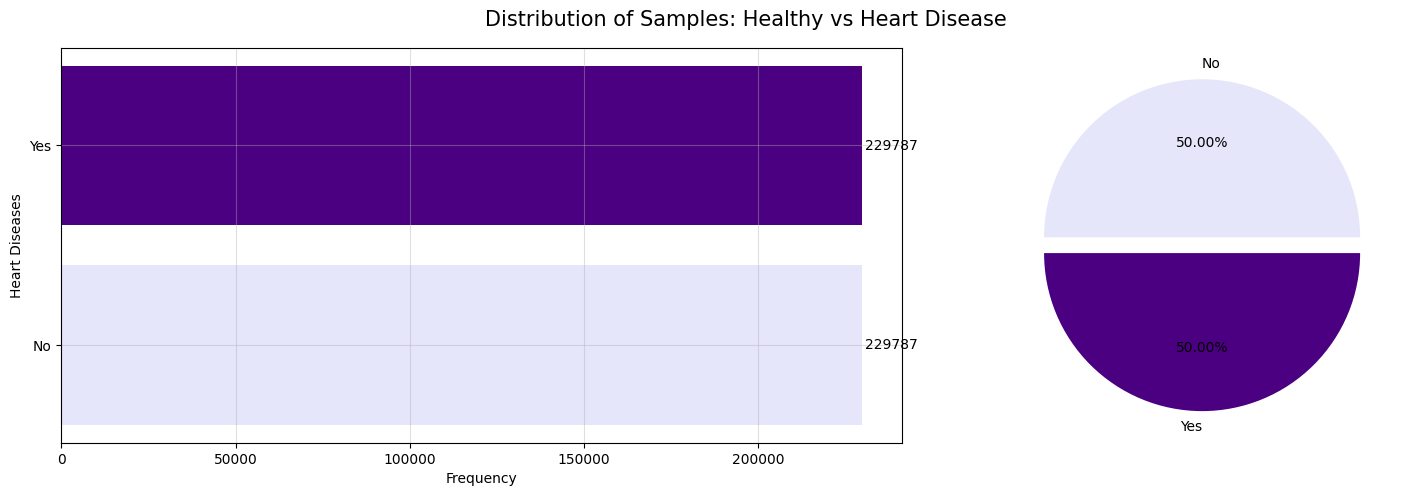

In [ ]:
# Get value counts for balanced target variable
targets = y_sm.value_counts()  # Count occurrences of each class after SMOTE
colors = ['lavender','indigo']  # Define color scheme for consistency

# Create subplot with different width ratios for bar and pie charts
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})

# Create horizontal bar chart showing balanced class frequencies
axes[0].barh(y=targets.index, width=targets.values, color=colors)  # Horizontal bar plot
axes[0].set_xlabel('Frequency')  # Label x-axis
axes[0].set_ylabel('Heart Diseases')  # Label y-axis
axes[0].set_yticks([0,1], ['No','Yes'])  # Set custom y-tick labels
axes[0].grid(alpha=0.4)  # Add grid with transparency

# Add frequency values as text on bars
for index, values in enumerate(targets):
    axes[0].text(values+1000, index, str(values), va='center')  # Add text annotation with values

# Create pie chart showing balanced percentage distribution
axes[1].pie(targets.values, labels=['No','Yes'], autopct='%.2f%%', 
           explode=([0.05]*len(targets.index)), colors=colors)  # Pie chart with explosion effect
figure.suptitle('Distribution of Samples: Healthy vs Heart Disease', fontsize=15)  # Add main title
plt.tight_layout(pad=1)  # Adjust layout to prevent overlap
plt.show()  # Display the combined plot

**Simple Balanced Target Visualization**

Creating a straightforward count plot to visualize the balanced target variable distribution after SMOTE.

<ipython-input-25-2923b028dc10>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_sm, palette='coolwarm')


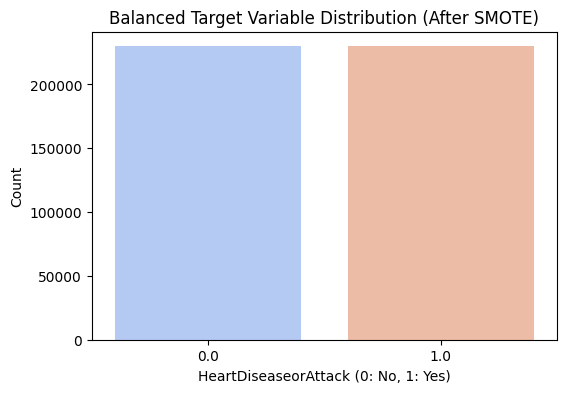

In [ ]:
# Create simple count plot for balanced target variable
plt.figure(figsize=(6, 4))  # Set figure size
sns.countplot(x=y_sm, palette='coolwarm')  # Create count plot with balanced data
plt.title('Balanced Target Variable Distribution (After SMOTE)')  # Add descriptive title
plt.xlabel('HeartDiseaseorAttack (0: No, 1: Yes)')  # Label x-axis with clear explanation
plt.ylabel('Count')  # Label y-axis
plt.show()  # Display the plot

**Data Splitting Strategy**

Implementing a three-way data split (train/validation/test) to ensure proper model evaluation and prevent overfitting.

In [ ]:
# Split the balanced dataset into train, validation, and test sets
# First split: 70% train, 30% temporary (which will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X_sm, y_sm, test_size=0.3, random_state=0)
# X_train, X_temp, y_train, y_temp = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=0) #training tabnet model using adasyn class balancing

# Second split: Split the 30% temporary into 15% validation and 15% test
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
# X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Print overview of data split dimensions
print("\nData Split Overview:")
print(f"Training Set: {X_train.shape}, {y_train.shape}")      # 70% of total data
print(f"Validation Set: {X_valid.shape}, {y_valid.shape}")    # 15% of total data
print(f"Test Set: {X_test.shape}, {y_test.shape}")            # 15% of total data


Data Split Overview:
Training Set: (321701, 21), (321701,)
Validation Set: (68936, 21), (68936,)
Test Set: (68937, 21), (68937,)


**TabNet Installation and Setup**

Installing the PyTorch TabNet library which implements TabNet, a state-of-the-art deep learning architecture for tabular data.

In [ ]:
# Install TabNet library if not already installed
!pip install pytorch-tabnet  # Install PyTorch TabNet package using pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.0 MB/s eta 0:00:00


**TabNet Model Preparation**

Importing TabNet libraries and preparing data in the required format for the deep learning model.

In [ ]:
# Import necessary libraries for TabNet implementation
from pytorch_tabnet.tab_model import TabNetClassifier  # Main TabNet classifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report  # Evaluation metrics
import torch  # PyTorch framework for deep learning

# Convert pandas DataFrames to numpy arrays (TabNet requires numpy arrays)
X_train_np = X_train.values  # Convert training features to numpy array
y_train_np = y_train.values  # Convert training target to numpy array
X_valid_np = X_valid.values  # Convert validation features to numpy array
y_valid_np = y_valid.values  # Convert validation target to numpy array
X_test_np = X_test.values    # Convert test features to numpy array
y_test_np = y_test.values    # Convert test target to numpy array

**TabNet Hyperparameter Configuration**

Configuring TabNet hyperparameters for optimal performance, including optimizer settings, learning rate scheduling, and attention mechanisms.

In [ ]:
# TabNet parameters with optimizations
tabnet_params = {
    "cat_idxs": [],  # Categorical column indices (empty as all features are numerical after preprocessing)
    "cat_dims": [],  # Categorical dimensions (empty as no categorical features)
    "cat_emb_dim": 2,  # Embedding dimension for categorical features
    "optimizer_fn": torch.optim.Adam,  # Adam optimizer for gradient descent
    "optimizer_params": {"lr": 1e-2},  # Learning rate set to 0.01
    "scheduler_params": {"step_size": 50, "gamma": 0.9},  # LR decay: reduce by 10% every 50 epochs
    "scheduler_fn": torch.optim.lr_scheduler.StepLR,  # Step learning rate scheduler
    # Alternative scheduler options (commented out):
    # "scheduler_params": {"patience": 5, "verbose": True},
    # "scheduler_fn": torch.optim.lr_scheduler.ReduceLROnPlateau,
    "mask_type": 'entmax'  # Attention masking type (entmax for better gradient flow than sparsemax)
}

# Initialize TabNet classifier with configured parameters
clf = TabNetClassifier(**tabnet_params)  # Unpack parameters dictionary

# Alternative manual configuration (commented out for reference):
# clf = TabNetClassifier(
#     n_d=64,  # Dimension of decision layer
#     n_a=64,  # Dimension of attention layer
#     n_steps=5,  # Number of decision steps
#     gamma=1.5,  # Relaxation factor for sparsemax
#     n_independent=2,  # Independent Gated Linear Units (GLU) layers
#     n_shared=2,  # Shared Gated Linear Units (GLU) layers
#     optimizer_fn=torch.optim.Adam,  # Optimizer function
#     optimizer_params=dict(lr=2e-2),  # Learning rate
#     scheduler_params={"step_size": 50, "gamma": 0.9},  # Learning rate scheduler
#     scheduler_fn=torch.optim.lr_scheduler.StepLR,  # Scheduler function
#     mask_type="sparsemax",  # Type of feature masking
#     verbose=1  # Enable verbosity
# )

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


 **TabNet Model Training**
 
Training the TabNet model with comprehensive configuration including early stopping, batch processing, and performance monitoring.

In [ ]:
# Train the TabNet model with comprehensive configuration
clf.fit(
    X_train=X_train_np, y_train=y_train_np,  # Training data (features and target)
    eval_set=[(X_train_np, y_train_np), (X_valid_np, y_valid_np)],  # Evaluation sets for monitoring
    eval_name=['train', 'valid'],  # Names for evaluation sets
    eval_metric=['accuracy'],  # Metric to monitor during training (accuracy)
    max_epochs=200,  # Maximum number of training epochs
    patience=60,  # Early stopping patience (stop if no improvement for 60 epochs)
    batch_size=4096,  # Batch size for training (number of samples per gradient update)
    virtual_batch_size=512,  # Virtual batch size for internal TabNet computation
    num_workers=0,  # Number of data loader workers (0 for single-threaded)
    weights=1,  # Class weights for handling imbalance (1 means equal weights)
    drop_last=False  # Whether to drop the last incomplete batch
)

epoch 0  | loss: 0.51481 | train_accuracy: 0.51144 | valid_accuracy: 0.51223 |  0:00:18s
epoch 1  | loss: 0.40173 | train_accuracy: 0.50315 | valid_accuracy: 0.5028  |  0:00:36s
epoch 2  | loss: 0.34349 | train_accuracy: 0.51072 | valid_accuracy: 0.51127 |  0:00:53s
epoch 3  | loss: 0.32347 | train_accuracy: 0.52498 | valid_accuracy: 0.52505 |  0:01:09s
epoch 4  | loss: 0.30828 | train_accuracy: 0.79722 | valid_accuracy: 0.79794 |  0:01:26s
epoch 5  | loss: 0.29879 | train_accuracy: 0.8319  | valid_accuracy: 0.83054 |  0:01:42s
epoch 6  | loss: 0.29506 | train_accuracy: 0.86924 | valid_accuracy: 0.86989 |  0:02:01s
epoch 7  | loss: 0.28658 | train_accuracy: 0.8754  | valid_accuracy: 0.87401 |  0:02:17s
epoch 8  | loss: 0.28249 | train_accuracy: 0.86267 | valid_accuracy: 0.86152 |  0:02:34s
epoch 9  | loss: 0.28    | train_accuracy: 0.87168 | valid_accuracy: 0.87018 |  0:02:50s
epoch 10 | loss: 0.27022 | train_accuracy: 0.87729 | valid_accuracy: 0.87626 |  0:03:07s
epoch 11 | loss: 0.27

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


**Initial Model Evaluation**

Performing initial evaluation of the trained TabNet model on the test set using AUC (Area Under Curve) metric

In [ ]:
# Evaluate model performance on the test set
preds = clf.predict_proba(X_test_np)[:, 1]  # Get probability predictions for positive class (heart disease)
test_auc = roc_auc_score(y_test_np, preds)  # Calculate AUC score
print(f"\nFinal Test AUC: {test_auc:.4f}")  # Print AUC score with 4 decimal places


Final Test AUC: 0.9633


**Comprehensive Model Evaluation**

Conducting comprehensive evaluation including accuracy, AUC, and detailed classification report for thorough performance assessment.


Test Set Evaluation:
Accuracy: 0.8997
AUC: 0.9633

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     34528
         1.0       0.93      0.87      0.90     34409

    accuracy                           0.90     68937
   macro avg       0.90      0.90      0.90     68937
weighted avg       0.90      0.90      0.90     68937



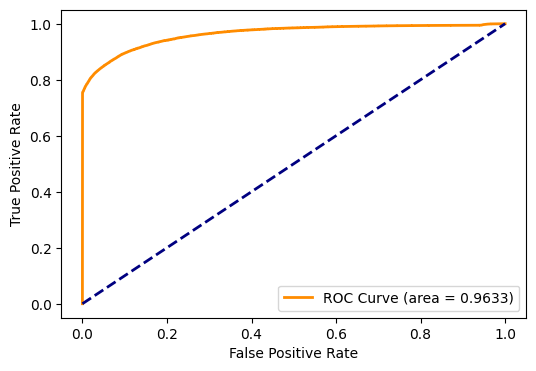

In [ ]:
# Comprehensive evaluation on the test set
preds = clf.predict_proba(X_test_np)[:, 1]  # Probability predictions for positive class
pred_labels = clf.predict(X_test_np)  # Binary class predictions (0 or 1)

# Calculate comprehensive metrics
test_accuracy = accuracy_score(y_test_np, pred_labels)  # Overall accuracy
test_auc = roc_auc_score(y_test_np, preds)  # Area under ROC curve

# Print comprehensive evaluation results
print("\nTest Set Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")  # Overall accuracy percentage
print(f"AUC: {test_auc:.4f}")  # AUC score for model discrimination ability
print("\nClassification Report:")
print(classification_report(y_test_np, pred_labels))  # Detailed precision, recall, F1 scores


# ROC Curve Visualization
# Creating ROC (Receiver Operating Characteristic) curve to visualize model performance across different classification thresholds.

# Import additional metrics for ROC curve plotting
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve components
fpr, tpr, _ = roc_curve(y_test_np, preds)  # False positive rate, true positive rate, thresholds
roc_auc = auc(fpr, tpr)  # Calculate area under ROC curve

# Create ROC curve plot
plt.figure(figsize=(6, 4))  # Set figure size
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.4f})')  # Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Plot diagonal reference line (random classifier)
# plt.title('Receiver Operating Characteristic (ROC) Curve')  # Title commented out
plt.xlabel('False Positive Rate')  # Label x-axis
plt.ylabel('True Positive Rate')   # Label y-axis
plt.legend(loc="lower right")      # Add legend in lower right corner
plt.show()  # Display the plot

**Multi-Set Classification Reports**

Generating detailed classification reports for training, validation, and test sets to assess model performance and potential overfitting.

In [ ]:
# Generate predictions for all data splits
y_train_pred = clf.predict(X_train_np)  # Training set predictions
y_valid_pred = clf.predict(X_valid_np)  # Validation set predictions
y_test_pred = clf.predict(X_test_np)    # Test set predictions

# Print classification reports for all splits
print("\nClassification Report on Training Set:")
print(classification_report(y_train_np, y_train_pred))  # Training performance

print("\nClassification Report on Validation Set:")
print(classification_report(y_valid_np, y_valid_pred))  # Validation performance

print("\nClassification Report on Test Set:")
print(classification_report(y_test_np, y_test_pred))    # Test performance


Classification Report on Training Set:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90    160772
         1.0       0.93      0.87      0.90    160929

    accuracy                           0.90    321701
   macro avg       0.90      0.90      0.90    321701
weighted avg       0.90      0.90      0.90    321701


Classification Report on Validation Set:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     34487
         1.0       0.93      0.87      0.90     34449

    accuracy                           0.90     68936
   macro avg       0.90      0.90      0.90     68936
weighted avg       0.90      0.90      0.90     68936


Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     34528
         1.0       0.93      0.87      0.90     34409

    accuracy                           0.90     68937
   macro a

**Detailed Metrics Calculation**

Calculating and displaying detailed performance metrics (accuracy, precision, recall, F1-score) for all data splits.

In [ ]:
# Import comprehensive evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate Training Set Metrics
train_accuracy = accuracy_score(y_train_np, y_train_pred)    # Training accuracy
train_precision = precision_score(y_train_np, y_train_pred) # Training precision
train_recall = recall_score(y_train_np, y_train_pred)       # Training recall
train_f1 = f1_score(y_train_np, y_train_pred)              # Training F1-score

# Print training metrics
print(f"\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")    # Percentage of correct predictions
print(f"Precision: {train_precision:.4f}")  # True positives / (True positives + False positives)
print(f"Recall: {train_recall:.4f}")        # True positives / (True positives + False negatives)
print(f"F1-Score: {train_f1:.4f}")          # Harmonic mean of precision and recall

In [37]:
# Training Set Metrics
train_accuracy = accuracy_score(y_train_np, y_train_pred)
train_precision = precision_score(y_train_np, y_train_pred)
train_recall = recall_score(y_train_np, y_train_pred)
train_f1 = f1_score(y_train_np, y_train_pred)

# Print metrics
print(f"\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")


Training Set Metrics:
Accuracy: 0.9011
Precision: 0.9291
Recall: 0.8686
F1-Score: 0.8978


In [ ]:
# Calculate Validation Set Metrics
valid_accuracy = accuracy_score(y_valid_np, y_valid_pred)    # Validation accuracy
valid_precision = precision_score(y_valid_np, y_valid_pred) # Validation precision
valid_recall = recall_score(y_valid_np, y_valid_pred)       # Validation recall
valid_f1 = f1_score(y_valid_np, y_valid_pred)              # Validation F1-score

print(f"\nValidation Set Metrics:")
print(f"Accuracy: {valid_accuracy:.4f}")    # Overall validation accuracy
print(f"Precision: {valid_precision:.4f}")  # Validation precision
print(f"Recall: {valid_recall:.4f}")        # Validation recall
print(f"F1-Score: {valid_f1:.4f}")          # Validation F1-score


Validation Set Metrics:
Accuracy: 0.8994
Precision: 0.9266
Recall: 0.8675
F1-Score: 0.8961


In [ ]:
# Calculate Test Set Metrics
test_accuracy = accuracy_score(y_test_np, y_test_pred)    # Test accuracy
test_precision = precision_score(y_test_np, y_test_pred) # Test precision
test_recall = recall_score(y_test_np, y_test_pred)       # Test recall
test_f1 = f1_score(y_test_np, y_test_pred)              # Test F1-score

print(f"\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")    # Final test accuracy
print(f"Precision: {test_precision:.4f}")  # Final test precision
print(f"Recall: {test_recall:.4f}")        # Final test recall
print(f"F1-Score: {test_f1:.4f}")          # Final test F1-score


Test Set Metrics:
Accuracy: 0.8997
Precision: 0.9291
Recall: 0.8651
F1-Score: 0.8960


**Feature Importance Analysis**

Analyzing and visualizing feature importance from the trained TabNet model to understand which features contribute most to predictions

<ipython-input-40-abda5cac9807>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=X.columns, palette="viridis")


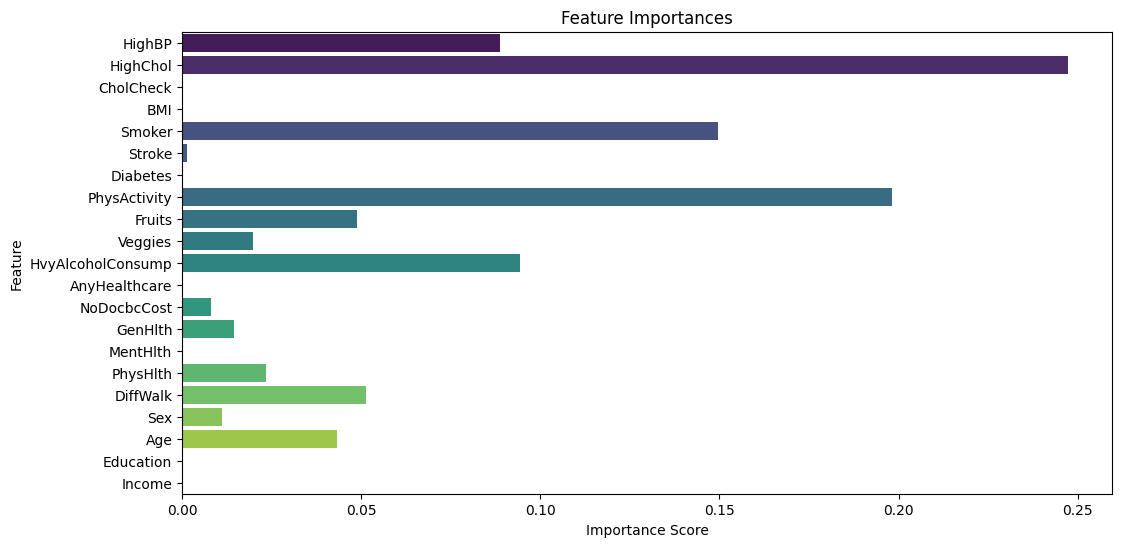

In [ ]:
# Extract and visualize feature importance from trained TabNet model
feature_importances = clf.feature_importances_  # Get feature importance scores from TabNet
plt.figure(figsize=(12, 6))  # Set figure size for better readability
sns.barplot(x=feature_importances, y=X.columns, palette="viridis")  # Create horizontal bar plot
plt.title("Feature Importances")  # Add title
plt.xlabel("Importance Score")    # Label x-axis
plt.ylabel("Feature")            # Label y-axis
plt.show()  # Display the plot

**Confusion Matrix Visualizations**

Creating confusion matrices for all data splits to visualize classification performance and identify misclassification patterns.

In [ ]:
# Import additional metrics for confusion matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

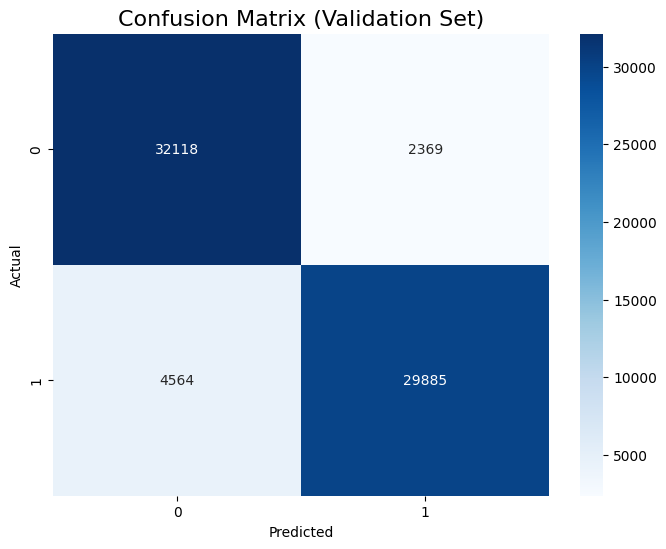

In [ ]:
# Validation Set Confusion Matrix
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(confusion_matrix(y_valid_np, y_valid_pred), annot=True, fmt="d", cmap="Blues")  # Create heatmap
plt.title("Confusion Matrix (Validation Set)", fontsize=16)  # Add title
plt.xlabel("Predicted")  # Label x-axis
plt.ylabel("Actual")     # Label y-axis
plt.show()  # Display the plot


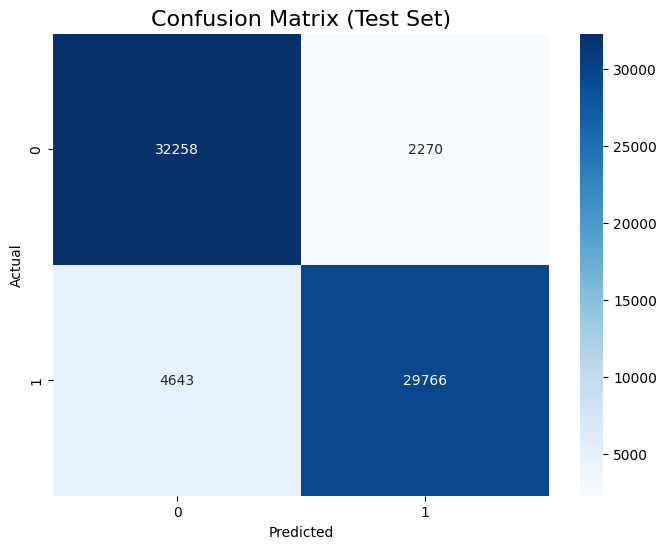

In [ ]:
# Test Set Confusion Matrix
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(confusion_matrix(y_test_np, y_test_pred), annot=True, fmt="d", cmap="Blues")  # Create heatmap
plt.title("Confusion Matrix (Test Set)", fontsize=16)  # Add title
plt.xlabel("Predicted")  # Label x-axis
plt.ylabel("Actual")     # Label y-axis
plt.show()  # Display the plot

**Validation vs Test Metrics Comparison**

Creating a comparative visualization of validation and test set performance to assess model generalization.

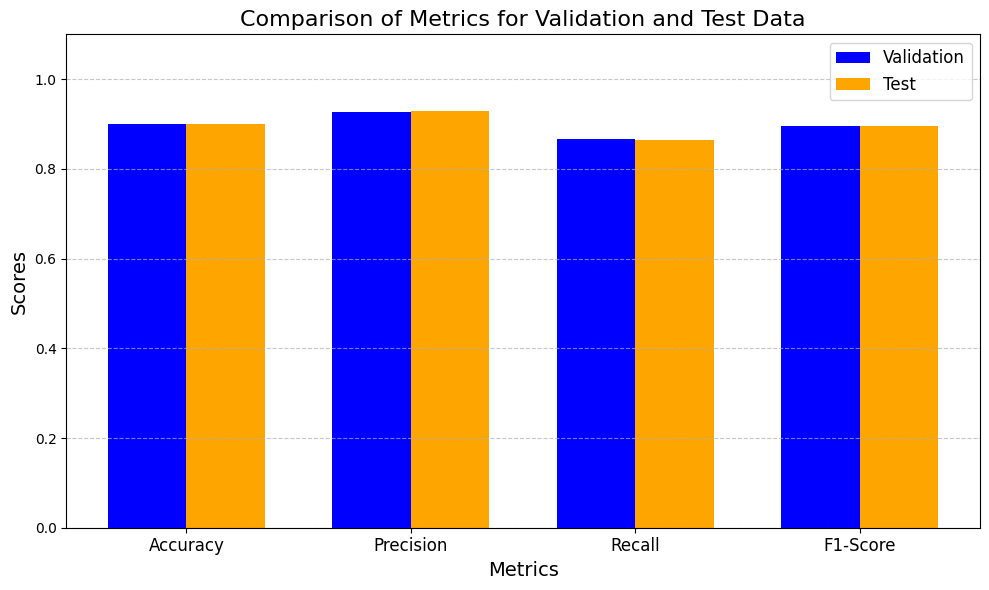

In [ ]:
# Prepare data for comparison plot (Validation vs Test)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']  # List of metrics to compare
validation_scores = [valid_accuracy, valid_precision, valid_recall, valid_f1]  # Validation scores array
test_scores = [test_accuracy, test_precision, test_recall, test_f1]            # Test scores array

x = np.arange(len(metrics))  # Create numerical array for x-axis bar positions (0, 1, 2, 3)
width = 0.35  # Set width of individual bars (controls spacing between grouped bars)

# Create grouped bar chart comparing validation and test performance
plt.figure(figsize=(10, 6))  # Set figure size (width=10, height=6 inches)
plt.bar(x - width/2, validation_scores, width, label='Validation', color='blue')  # Plot validation bars (offset left)

# Customize plot appearance and labels
plt.xlabel('Metrics', fontsize=14)     # Set x-axis label with font size
plt.ylabel('Scores', fontsize=14)      # Set y-axis label with font size
plt.title('Comparison of Metrics for Validation and Test Data', fontsize=16)  # Set main title with larger font
plt.xticks(ticks=x, labels=metrics, fontsize=12)  # Set x-axis tick positions and labels
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1 (allows space above 1.0)
plt.legend(fontsize=12)  # Add legend with specified font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines (dashed, semi-transparent)

# Display the final plot
plt.tight_layout()  # Automatically adjust layout to prevent label cutoff
plt.show()  # Render and display the plot


**Complete Performance Comparison (Train/Validation/Test)**

Creating a comprehensive three-way comparison of model performance across all data splits to identify overfitting or underfitting patterns.

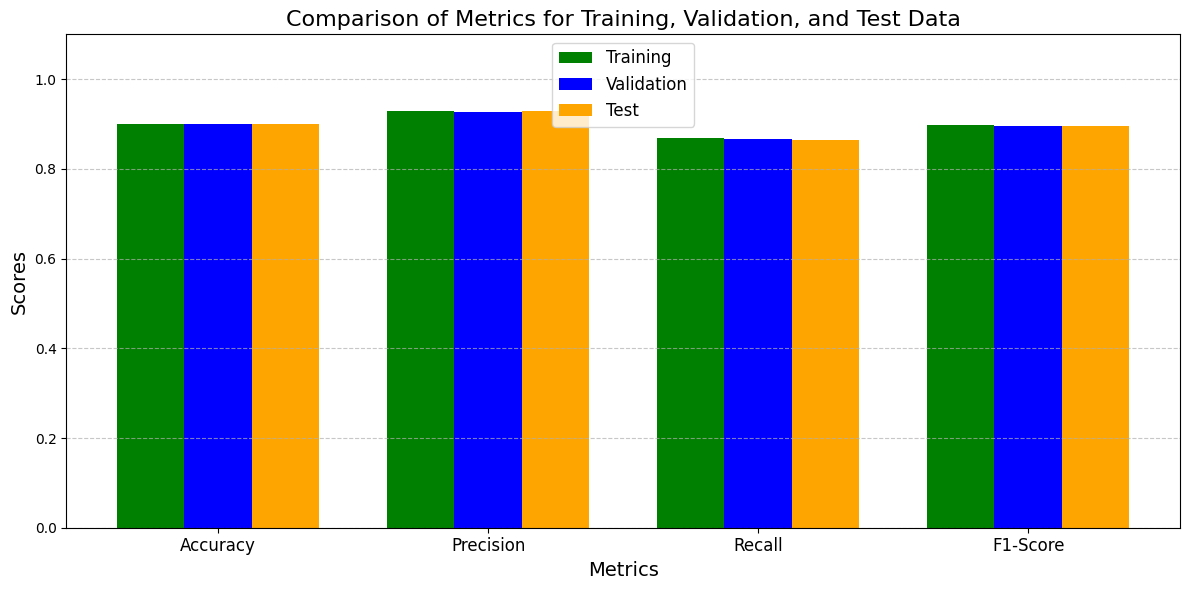

In [ ]:
# Prepare data for comprehensive three-way comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']  # List of performance metrics to compare
train_scores = [train_accuracy, train_precision, train_recall, train_f1]         # Training set scores
validation_scores = [valid_accuracy, valid_precision, valid_recall, valid_f1]    # Validation set scores
test_scores = [test_accuracy, test_precision, test_recall, test_f1]              # Test set scores

x = np.arange(len(metrics))  # Create numerical positions for x-axis (0, 1, 2, 3)
width = 0.25  # Set bar width (narrower than two-group comparison to fit three groups)

# Create three-group bar chart
plt.figure(figsize=(12, 6))  # Set larger figure size to accommodate three bar groups
plt.bar(x - width, train_scores, width, label='Training', color='green')        # Training bars (left offset)
plt.bar(x, validation_scores, width, label='Validation', color='blue')          # Validation bars (center)
plt.bar(x + width, test_scores, width, label='Test', color='orange')            # Test bars (right offset)

# Customize plot appearance and add comprehensive labeling
plt.xlabel('Metrics', fontsize=14)     # Set x-axis label with readable font size
plt.ylabel('Scores', fontsize=14)      # Set y-axis label with readable font size
plt.title('Comparison of Metrics for Training, Validation, and Test Data', fontsize=16)  # Descriptive title
plt.xticks(ticks=x, labels=metrics, fontsize=12)  # Set x-axis tick positions and metric names
plt.ylim(0, 1.1)  # Set y-axis range from 0 to 1.1 (provides headroom above perfect score)
plt.legend(fontsize=12)  # Add legend distinguishing the three data splits
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal reference grid lines

# Finalize and display the comprehensive comparison plot
plt.tight_layout()  # Optimize layout spacing to prevent text overlap
plt.show()  # Render and display the final comparison visualization2, test_scores, width, label='Test', color='orange')          # Plot test bars (offset right)